Name: Dang Quynh Tram Nguyen

Matrikelnummer: 5311561

# Bioinformatik in der Arzneistoffforschung: 

## Blatt 1: Simulation eines Pharmaunternehmens

### Simulator

In [1]:
import pandas as pd

In [2]:
stg = pd.read_excel('Aufgabenblatt 1.xlsx',sheet_name="Stage-Gate-Prozess",index_col=0,names=['Dauer','Erfolgsrate'],skiprows=0)
stg

,Dauer,Erfolgsrate
TF,2,0.90
TV,1,0.50
HTS,1,0.80
LF,1,0.90
2TV,2,0.50
LO,3,0.50
Prf,1,0.33
P1,1,0.80
P2,2,0.50
P3,3,0.80


In [3]:
steps = stg.index.tolist()
steps.append('Markt')
steps

['TF', 'TV', 'HTS', 'LF', '2TV', 'LO', 'Prf', 'P1', 'P2', 'P3', 'Fil', 'Markt']

In [4]:
# Erfolgsrate Liste: Die Position der Erfolgsrate eines Schrittes entspricht dieselben der nächsten Schritt in steps Liste
erfolgsrate = stg.loc[:,'Erfolgsrate'].tolist()
erfolgsrate.insert(0,0)

In [5]:
def print_table(table):
    for i in table:
        print(i,table[i])

        
# Initalitieren ein Dictionary der Anzahl der Experiments, die jeden Schritt in jedem Jahr entspricht. Wenn ein Schritt mehr als
# ein Jahr dauert, ist die Anzahl unten eine Liste gespeichert. Die Position in der Liste entspricht die laufende Zeit des Experiments. 
def initiation_table():
    global dauer,steps
    table = {}
    for i in steps:
        table[i] = [0]
    
    for i in steps:
        if i == 'Markt': break
        if stg.loc[i]['Dauer']>1: table[i] = [[0 for i in range(int(stg.loc[i]['Dauer']))]]
    #print_table(table)
    
    return table

In [6]:
# Ändern die Liste/die Anzahl der Experiments anhand ihrer laufenden Zeit
# index_phase, index_prephase: Anzahl (Liste oder Integer) der Experiments in einer Phase und  der vorliegenden Phase
# Rückgabe: die Anzahl der Experiments in einem Schritt im nächsten Jahr alle Experiment (in Liste oder Integer)
# vom vorliegenden Schritt (auch die falschgeschlagenen) 
def next_year(index_phase, index_prephase):
    # Wenn i_p Liste ist, schieben ihre Indexes einmal vorwärts
    if isinstance(index_phase,list):
        i_p = index_phase.copy()
        for i in range(len(i_p)-1,0,-1):
            i_p[i] = i_p[i-1]
        
        i_p[0] = index_prephase[-1] if isinstance(index_prephase,list) else index_prephase
    
    # Wenn i_p int ist
    else: i_p = index_prephase[-1] if isinstance(index_prephase,list) else index_prephase
    
    return i_p



# Durch die Zufälligkeit zählen die erfolgreichen Experiments
import random as rd
def success(experiments, erfolgsrate):
    success_experiments = 0
    while experiments > 0:
        posibility = rd.random()
        if posibility <= erfolgsrate: success_experiments += 1
        
        experiments -= 1
    return success_experiments

In [7]:
# Simulieren das Dictionary table in einem nächsten Jahr
def simulation_table(table : dict):
    global steps, erfolgsrate 
    
    # Addieren die Anzahl der Experiment in jedem Schritt (Erfolgreiche Experiments sind noch nicht berechnet)
    for i in range(-1,-len(steps)-1,-1):
        #index_phase = table[steps[i]][-1].copy() if type(table[steps[i]][-1]) == list else table[steps[i]][-1] 
        #index_prephase = table[steps[i-1]][-1].copy() if type (ta)
        if i == -len(steps):
            #print('add new experiment')
            # Addieren die Anzahl der neuen Experiments im TF Schritt
            table[steps[i]].append(next_year(table[steps[i]][-1], 10))
            
        else: table[steps[i]].append(next_year(table[steps[i]][-1], table[steps[i-1]][-1]))   
    #print("neue Anzahl addiert")    
    #print_table(table)
    
    # Zählen die erfolgreiche Experiments und aktuallisieren die Anzahl
    for i in range(1,len(steps)):
        if type(table[steps[i]][-1]) == list: table[steps[i]][-1][0] = success(table[steps[i]][-1][0],erfolgsrate[i])
        else: table[steps[i]][-1] = success(table[steps[i]][-1],erfolgsrate[i])
    #print("erfolgreiche Experiments aktualisiert")
    #print_table(table)
    
    return table 

In [8]:
# Befehl
table = initiation_table()
table

{'TF': [[0, 0]],
 'TV': [0],
 'HTS': [0],
 'LF': [0],
 '2TV': [[0, 0]],
 'LO': [[0, 0, 0]],
 'Prf': [0],
 'P1': [0],
 'P2': [[0, 0]],
 'P3': [[0, 0, 0]],
 'Fil': [0],
 'Markt': [0]}

In [9]:
# Aktualisieren DataFrame simulation_result in einem nächsten Jahr durch das simulierte Dict table
def simulation(simulation_result: pd.DataFrame,table: dict):
    new_row = [table[key][-1] for key in table.keys()]
    for i in range(len(new_row)):
        if isinstance(new_row[i],list): new_row[i] = sum(new_row[i])
    simulation_result.loc[len(simulation_result)+1] = new_row
    return simulation_result

In [10]:
# Initiation
simulation_result = pd.DataFrame(columns=steps)
simulation_result

# Befehl
# Bespiel: Eine Simulation, wenn die Geschäft das Steady State erreicht
medikamente = 0
while medikamente < 1:
    simulation_table(table)
    simulation(simulation_result, table)
    
    medikamente += simulation_result.loc[len(simulation_result),'Markt']

simulation_result

,TF,TV,HTS,LF,2TV,LO,Prf,P1,P2,P3,Fil,Markt
1,10,0,0,0,0,0,0,0,0,0,0,0
2,20,0,0,0,0,0,0,0,0,0,0,0
3,20,10,0,0,0,0,0,0,0,0,0,0
4,20,8,6,0,0,0,0,0,0,0,0,0
5,20,9,5,6,0,0,0,0,0,0,0,0
6,20,9,6,4,6,0,0,0,0,0,0,0
7,20,10,3,5,9,0,0,0,0,0,0,0
8,20,9,8,1,6,3,0,0,0,0,0,0
9,20,9,5,8,4,4,0,0,0,0,0,0
10,20,9,7,4,8,7,0,0,0,0,0,0


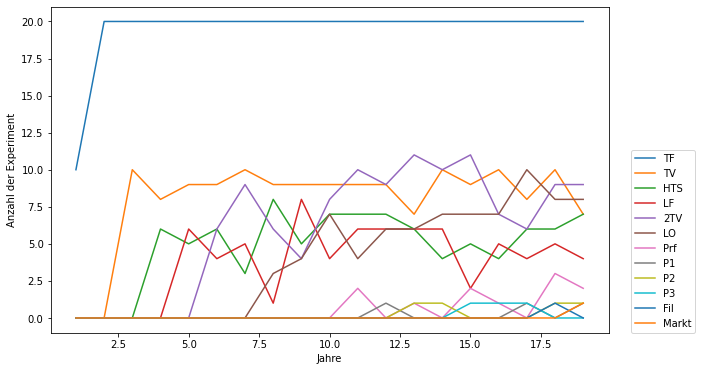

In [11]:
# Graphik der Simulation
import matplotlib.pyplot as plt

simulation_result.plot(kind='line',xlabel='Jahre',ylabel='Anzahl der Experiment',figsize=(10,6))
plt.legend(loc=(1.04, 0))
plt.show()

**2 Kosten und Profit**

**Kosten**


In [12]:
mitarbeiter_table = pd.read_excel('Aufgabenblatt 1.xlsx',index_col=0, header=None,names=['Basismannschaft','Mitarbeiter'],skiprows=1, sheet_name="Kosten")
mitarbeiter_table

,Basismannschaft,Mitarbeiter
TF,5,5
TV,25,2
HTS,27,3
LF,14,13
2TV,5,3
LO,10,14
Prf,71,12
P1,45,55
P2,55,80
P3,80,120


In [13]:
# Initiation
kosten_table = pd.DataFrame({'Kosten':[],'Umsatz':[],'Patent':[]})

In [14]:
# Berechnen das Kosten in einem Jahr
def kosten(kosten_table : pd.DataFrame, simulation_result_latest_year : pd.Series, len_sim_res):
    k = 125000 #Euro
    new_row = list(simulation_result_latest_year)
    new_row.pop() #Löschen die Anzahl der Produkt (von der 'Markt'-Spalte)
    for i in range(len(new_row)):
        new_row[i] = (new_row[i]*mitarbeiter_table.iloc[i].at['Mitarbeiter'] + mitarbeiter_table.iloc[i].at['Basismannschaft'])*k
    
    kosten_table.at[len_sim_res,'Kosten'] = sum(new_row)
    
    return kosten_table

In [15]:
# Befehl
kosten(kosten_table,simulation_result.loc[len(simulation_result)], len(simulation_result))
kosten_table

,Kosten,Umsatz,Patent
19,103375000.0,NaN,NaN


**Umsätze**

In [16]:
maximal_Umsatz = 10**9 #Euro

In [17]:
markt_table = pd.read_excel('Aufgabenblatt 1.xlsx',index_col=0, header=0,sheet_name="Markt")
markt_table

,% vom maximalen Umsatz
Jahre nach Markteinfuhrung,
0,0.15
1,0.30
2,0.45
3,0.45
4,0.60
5,0.60
6,0.80
7,1.00
>7,1.00


In [18]:
import math
# Aktualisieren ein bestimmtes Zell in kosten_table. Wenn es keinen Wert oder NaN gibt, erstellen ein Zell mit dem neuen Wert,
# sonst, addieren den neuen Wert zu dem alten
def update_cell(kosten_table : pd.DataFrame, check_index, column, new_value):
    assert column in kosten_table.columns, 'Column does not pass'
    
    if check_index in kosten_table.index and not math.isnan(kosten_table.at[check_index,column]):
        kosten_table.at[check_index,column] += new_value
    else: kosten_table.at[check_index,column] = new_value

In [19]:
#Initiation
markt_9 = {} # Dict der Medikamente, die über 8 Jahre veröffentlicht sind. Ihr 9. Jahr gilt als den Schlüssel von Dict

# Berechnen den Umsatz in einem Jahr, in dem es die über 8 Jahre vorhandenen Medikamente gibt
def value_markt_9(index,markt_9:dict):
    global maximal_Umsatz
    
    value = 0
    for j in markt_9.keys():
        if j <= index: # im aktualisierten Jahr ist die Medikament mind. 8 Jahre auf dem Markt vorhanden
            value += markt_9[j] * maximal_Umsatz
    
    return value



# Berechnen die Umsätz in einem Jahr und wenn möglich, auch in 7 weiteren Jahre
def umsatz(kosten_table,markt : int, markt_9: dict, len_sim_res):
    global markt_table, maximal_Umsatz
    
    if markt == 0: #Keinen Umsatz von neue Medikamente, nur den Umsatz den alten Medikamente (wenn vorhanden)
        new_value = value_markt_9(len_sim_res, markt_9)
        update_cell(kosten_table, len_sim_res, 'Umsatz', new_value)
    else:
        # Aktualisieren den Umsatz in 8 Jahre
        for i in range(len(markt_table)-1):
            new_value = (markt * markt_table.iloc[i].at['% vom maximalen Umsatz']) * maximal_Umsatz
            
            new_value += value_markt_9(len_sim_res+i, markt_9)
            update_cell(kosten_table, len_sim_res+i, 'Umsatz', new_value)
        
        # Addieren Medikamente, die über 8 Jahr vorhanden sind, zu Dict markt_9
        markt_9[len_sim_res+8] = markt
    
    return {'kosten_table': kosten_table, 'markt_9': markt_9}


In [20]:
#Initiation
markt_9 = {} # Dict der Medikamente, die über 8 Jahre veröffentlicht sind. Ihr 9. Jahr gilt als den Schlüssel von Dict

# Befehl
umsatz_0 = umsatz(kosten_table, simulation_result.loc[len(simulation_result),'Markt'], markt_9, len(simulation_result))

kosten_table = umsatz_0['kosten_table']
kosten_table

,Kosten,Umsatz,Patent
19,103375000.0,1.500000e+08,NaN
20,NaN,3.000000e+08,NaN
21,NaN,4.500000e+08,NaN
22,NaN,4.500000e+08,NaN
23,NaN,6.000000e+08,NaN
24,NaN,6.000000e+08,NaN
25,NaN,8.000000e+08,NaN
26,NaN,1.000000e+09,NaN


In [21]:
markt_9 = umsatz_0['markt_9']
markt_9

{27: 1}

In [22]:
# Beispiel
tem = kosten_table.copy()
tem_markt_9 = {}
umsatz_1 = umsatz(tem, 2, tem_markt_9, len(simulation_result))
tem = umsatz_1['kosten_table']
tem

,Kosten,Umsatz,Patent
19,103375000.0,4.500000e+08,NaN
20,NaN,9.000000e+08,NaN
21,NaN,1.350000e+09,NaN
22,NaN,1.350000e+09,NaN
23,NaN,1.800000e+09,NaN
24,NaN,1.800000e+09,NaN
25,NaN,2.400000e+09,NaN
26,NaN,3.000000e+09,NaN


In [23]:
tem_markt_9 = umsatz_1['markt_9']
tem_markt_9

{27: 2}

**Patent**

In [24]:
patent_table = pd.read_excel('Aufgabenblatt 1.xlsx',index_col=0, header=0, sheet_name="Patent")
patent_table

,% vom tatsachlichen maximalen Umsatz
Jahre nach Patentablauf,
0,0.8
1,0.5
2,0.3
>2,0.2
>20,0.0


In [25]:
def patent(kosten_table : pd.DataFrame, prf: int, len_sim_res):
    global patent_table, maximal_Umsatz
    
    if prf == 0: 
        update_cell(kosten_table,len_sim_res, 'Patent', 0)
    else:
        # Aktualisieren den Patent in 3 Jahre
        for i in range(len(patent_table)-2):
            new_value = prf * patent_table.iloc[i].at['% vom tatsachlichen maximalen Umsatz'] * maximal_Umsatz
            update_cell(kosten_table, len_sim_res+i, 'Patent', new_value)
        
        # Aktualisieren den Patent in 18 nächsten Jahre  
        for i in range(len_sim_res+3,len_sim_res+21):
            new_value = prf * 0.2 * maximal_Umsatz
            update_cell(kosten_table, i, 'Patent', new_value)
    
    return kosten_table

In [26]:
# Befehl
kosten_table = patent(kosten_table,simulation_result.loc[len(simulation_result),'Prf'], len(simulation_result))
kosten_table

,Kosten,Umsatz,Patent
19,103375000.0,1.500000e+08,1.600000e+09
20,NaN,3.000000e+08,1.000000e+09
21,NaN,4.500000e+08,6.000000e+08
22,NaN,4.500000e+08,4.000000e+08
23,NaN,6.000000e+08,4.000000e+08
24,NaN,6.000000e+08,4.000000e+08
25,NaN,8.000000e+08,4.000000e+08
26,NaN,1.000000e+09,4.000000e+08
27,NaN,NaN,4.000000e+08
28,NaN,NaN,4.000000e+08


In [27]:
#Beispiel
tem = kosten_table.copy()
patent(tem,2, len(simulation_result))
kosten_table

,Kosten,Umsatz,Patent
19,103375000.0,1.500000e+08,1.600000e+09
20,NaN,3.000000e+08,1.000000e+09
21,NaN,4.500000e+08,6.000000e+08
22,NaN,4.500000e+08,4.000000e+08
23,NaN,6.000000e+08,4.000000e+08
24,NaN,6.000000e+08,4.000000e+08
25,NaN,8.000000e+08,4.000000e+08
26,NaN,1.000000e+09,4.000000e+08
27,NaN,NaN,4.000000e+08
28,NaN,NaN,4.000000e+08


In [28]:
# Berechen die Schulden (negativen Wert) oder die Gewinne (positiven Wert)
# sum(Umsatz) + sum(Patent) - sum(Kosten)
def schulden(kosten_table: pd.DataFrame, simulation_result: pd.DataFrame):
    return kosten_table.loc[:len(simulation_result),['Umsatz','Patent']].sum().sum() - kosten_table.loc[:len(simulation_result),'Kosten'].sum()

In [29]:
# Befehl
schulden_gewinn_result = schulden(kosten_table, simulation_result)
schulden_gewinn_result

1646625000.0

**Investoren**

In [30]:
# Eine Simulation wird durchgeführt, um an diese Geschäft zu investieren, bis sie zurück bezahlen kann.
# Die Geschäft kann alle Schulden zurück bezahlen, da die Summe der Umsätze und der Patent größer als die Kosten ist.
def complete_simulation_for_investoren():
    # Initiation
    table = initiation_table()
    simulation_result = pd.DataFrame(columns=steps)
    kosten_table = pd.DataFrame({'Kosten':[],'Umsatz':[],'Patent':[]})
    markt_9 = {}
    schulden_gewinn_result = -1

    while schulden_gewinn_result < 0: 
        table = simulation_table(table) # Simulieren die Liste der Experiments in einem Jahr
        simulation_result = simulation(simulation_result, table) # Speichern Simulation in ein DataFrame simulation_result 
        
        # Aktualisieren die kosten_table, was die Kosten, Umsätze und die Patentgewinne ennthält
        kosten_table= kosten(kosten_table, simulation_result.loc[len(simulation_result)], len(simulation_result)) # Aktualisieren die Kosten in demselben Jahr
        
        umsatz_result = umsatz(kosten_table,simulation_result.loc[len(simulation_result),'Markt'], markt_9, len(simulation_result)) # Aktualisieren den Umsatz in demselben Jahr
        kosten_table = umsatz_result['kosten_table']
        markt_9 = umsatz_result['markt_9']
        
        kosten_table = patent(kosten_table, simulation_result.loc[len(simulation_result),'Prf'], len(simulation_result)) # Aktualisieren die Patentgewinne in demselben Jahr
        
        schulden_gewinn_result = schulden(kosten_table,simulation_result) # Berechen den Schulden/Gewinn


    kosten_result = kosten_table.loc[:len(simulation_result)] #kosten_table, aber die Jahre entsprechen desselben in simulation_result

    #Ergebnisse
    simulation_result
    kosten_result
    schulden_gewinn_result
    
    # Rückgaben: das Jahr, wenn die Geschäft alle Schulden zurück bezahlt, und die ingesamte Investoren
    return {'Jahr': len(simulation_result), 'Investion': kosten_result['Kosten'].sum()}


In [31]:
jahre = []
investion = []

# Simulation 100 Mal
count = 100
while count > 0:
    result = complete_simulation_for_investoren()
    jahre.append(result['Jahr'])
    investion.append(result['Investion'])
    
    count -= 1

print(jahre)
print(investion)

[11, 11, 11, 11, 14, 22, 15, 14, 11, 14, 12, 15, 11, 16, 11, 11, 13, 14, 11, 14, 13, 12, 11, 14, 11, 14, 11, 11, 12, 12, 11, 11, 14, 11, 11, 11, 15, 12, 17, 11, 11, 11, 11, 11, 11, 11, 14, 12, 12, 11, 11, 11, 15, 11, 11, 12, 13, 19, 14, 14, 11, 11, 11, 11, 13, 11, 11, 11, 11, 11, 14, 15, 12, 11, 11, 12, 11, 11, 12, 11, 11, 14, 11, 12, 11, 11, 12, 12, 15, 11, 12, 11, 12, 12, 11, 11, 11, 13, 11, 11]
[736750000.0, 726250000.0, 690500000.0, 690750000.0, 932875000.0, 1474500000.0, 1003500000.0, 926000000.0, 722500000.0, 920875000.0, 762250000.0, 1038375000.0, 717500000.0, 1063000000.0, 701625000.0, 713750000.0, 899000000.0, 918500000.0, 718875000.0, 903625000.0, 850500000.0, 780250000.0, 721500000.0, 924375000.0, 739750000.0, 951250000.0, 715625000.0, 707875000.0, 778750000.0, 778500000.0, 741375000.0, 746625000.0, 913375000.0, 720375000.0, 721375000.0, 711000000.0, 1054000000.0, 787375000.0, 1236750000.0, 746625000.0, 727500000.0, 727625000.0, 710625000.0, 740875000.0, 706875000.0, 7062500

In [32]:
import statistics

print('Der mean-Wert von der Liste jahre der 100 Simulationen:',int(statistics.mean(jahre)))
print('Der mean-Wert von der Liste investion der 100 Simulationen:',statistics.mean(investion))

Der mean-Wert von der Liste jahre der 100 Simulationen: 12
Der mean-Wert von der Liste investion der 100 Simulationen: 807137500.0


In [33]:
# Hypothese: nach mean(jahre) Jahre kann die Geschäft 90% wahrscheinlich alle Schulden bezahlen
# Fuhren ein T-Test durch, um schätzen, ob der mean-Wert passt die Hypothese ist. Dann schauen das Konfidenzintervall von 90% an und bestimmen das Ergebnis 
import scipy
from scipy import stats
res = stats.ttest_1samp(jahre, popmean= int(statistics.mean(jahre)))
ci = res.confidence_interval(confidence_level=0.90)
print('Konfidenzintervall der Jahre:',ci)

Konfidenzintervall der Jahre: ConfidenceInterval(low=11.886913641112741, high=12.513086358887257)


**Frage 2/ Frage 4:** Die Konfidenzintervall von einem Niveau (z. B. 90%) zeigt ein Intervall an, in dem das Ergebnis jeder Simulation 90% wahrscheinlich auftritt. Mit dem Konfidenzniveau von 90% zeigt die Konfidenzintervall der Jahre in diesem Test  in (11,13) an. Deswegen ist es geschätzt, dass die Geschäft nach 12 Jahre alle Schulden zurück bezahlen kann. 

In [34]:
# Fuhren auch ein T-Test für Investion durch
res2 = stats.ttest_1samp(investion,popmean=statistics.mean(investion))
ci2 = res2.confidence_interval(confidence_level=0.90)
print('Konfidenzintervall der Investion:',ci2)

Konfidenzintervall der Investion: ConfidenceInterval(low=784257712.2050855, high=830017287.7949144)


**Frage 1:** Mit Konfidenzniveau von 90% zeigt die Konfidenzintervall der Investion in (7.7M,8.2M) an. Deswegen ist es geschätzt, dass die Investoren ca. 7.8M - 8.2M Euro benötigen, an die Geschäft zu investieren.

**Gewinn im Steady State**

In [35]:
# Ein Simulation, um die Zeit der Steady State zu schätzen. Das Steady State erreicht die Geschäft, wenn alle Schritte der Arzneistoffforschung
# mindesten ein Experiment hat und mindesten ein Medikament auf dem Markt gekauft wird.
def complete_simulation_for_steady_state():
    # Initiation
    table = initiation_table()
    simulation_result = pd.DataFrame(columns=steps)
    kosten_table = pd.DataFrame({'Kosten':[],'Umsatz':[],'Patent':[]})
    markt_9 = {}
    markt = 0

    while markt < 1:
        table = simulation_table(table) # Simulieren die Liste der Experiments in einem Jahr
        simulation_result = simulation(simulation_result, table) # Speichern Simulation in ein DataFrame simulation_result 
        
        # Aktualisieren die kosten_table, was die Kosten, Umsätze und die Patentgewinne ennthält
        kosten_table= kosten(kosten_table, simulation_result.loc[len(simulation_result)], len(simulation_result)) # Aktualisieren die Kosten in demselben Jahr
        
        umsatz_result = umsatz(kosten_table,simulation_result.loc[len(simulation_result),'Markt'], markt_9, len(simulation_result)) # Aktualisieren den Umsatz in demselben Jahr
        kosten_table = umsatz_result['kosten_table']
        markt_9 = umsatz_result['markt_9']
        
        kosten_table = patent(kosten_table, simulation_result.loc[len(simulation_result),'Prf'], len(simulation_result)) # Aktualisieren die Patentgewinne in demselben Jahr
        
        markt += simulation_result.loc[len(simulation_result),'Markt']

    kosten_result = kosten_table.loc[:len(simulation_result)] #kosten_table, aber die Jahre entsprechen desselben in simulation_result
    kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
    
    
    #Ergebnisse
    simulation_result
    kosten_result
    
    # Rückgaben: das Jahr, wenn die Geschäft Steady State erreicht, und ein DataFrame des Gewinns pro Jahr
    return {'Jahr': len(simulation_result), 'kosten_gewinn': kosten_result['Schulden/Gewinn']}


In [36]:
jahre_steady_stade = []
gewinn = []
# Simulation 100 Mal
count = 100
while count > 0:
    result = complete_simulation_for_steady_state()
    jahre_steady_stade.append(result['Jahr'])
    gewinn.append(result['kosten_gewinn'])
    count -= 1

C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:2

C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:2

C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:2

C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:2

C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:2

C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kosten_result['Schulden/Gewinn'] = kosten_result['Umsatz'] + kosten_result['Patent'] - kosten_result['Kosten']
C:\Users\quynh\AppData\Local\Temp\ipykernel_31772\876063707.py:2

In [37]:
#Schätzen die Steady State durch Konfidenzintervall vom T-Test
res3 = stats.ttest_1samp(jahre_steady_stade,popmean=int(statistics.mean(jahre_steady_stade)))
ci3 = res3.confidence_interval(confidence_level=0.90)
print(ci3)

ConfidenceInterval(low=29.754710751097345, high=34.865289248902656)


Anhand der Konfidenzintervall (29,35) vom T-Test schätzt man, dass die Geschäft nach mindestens 30 Jahre das Steady State erreichen kann.

**Frage 3:** Der Gewinn manchen Simulation

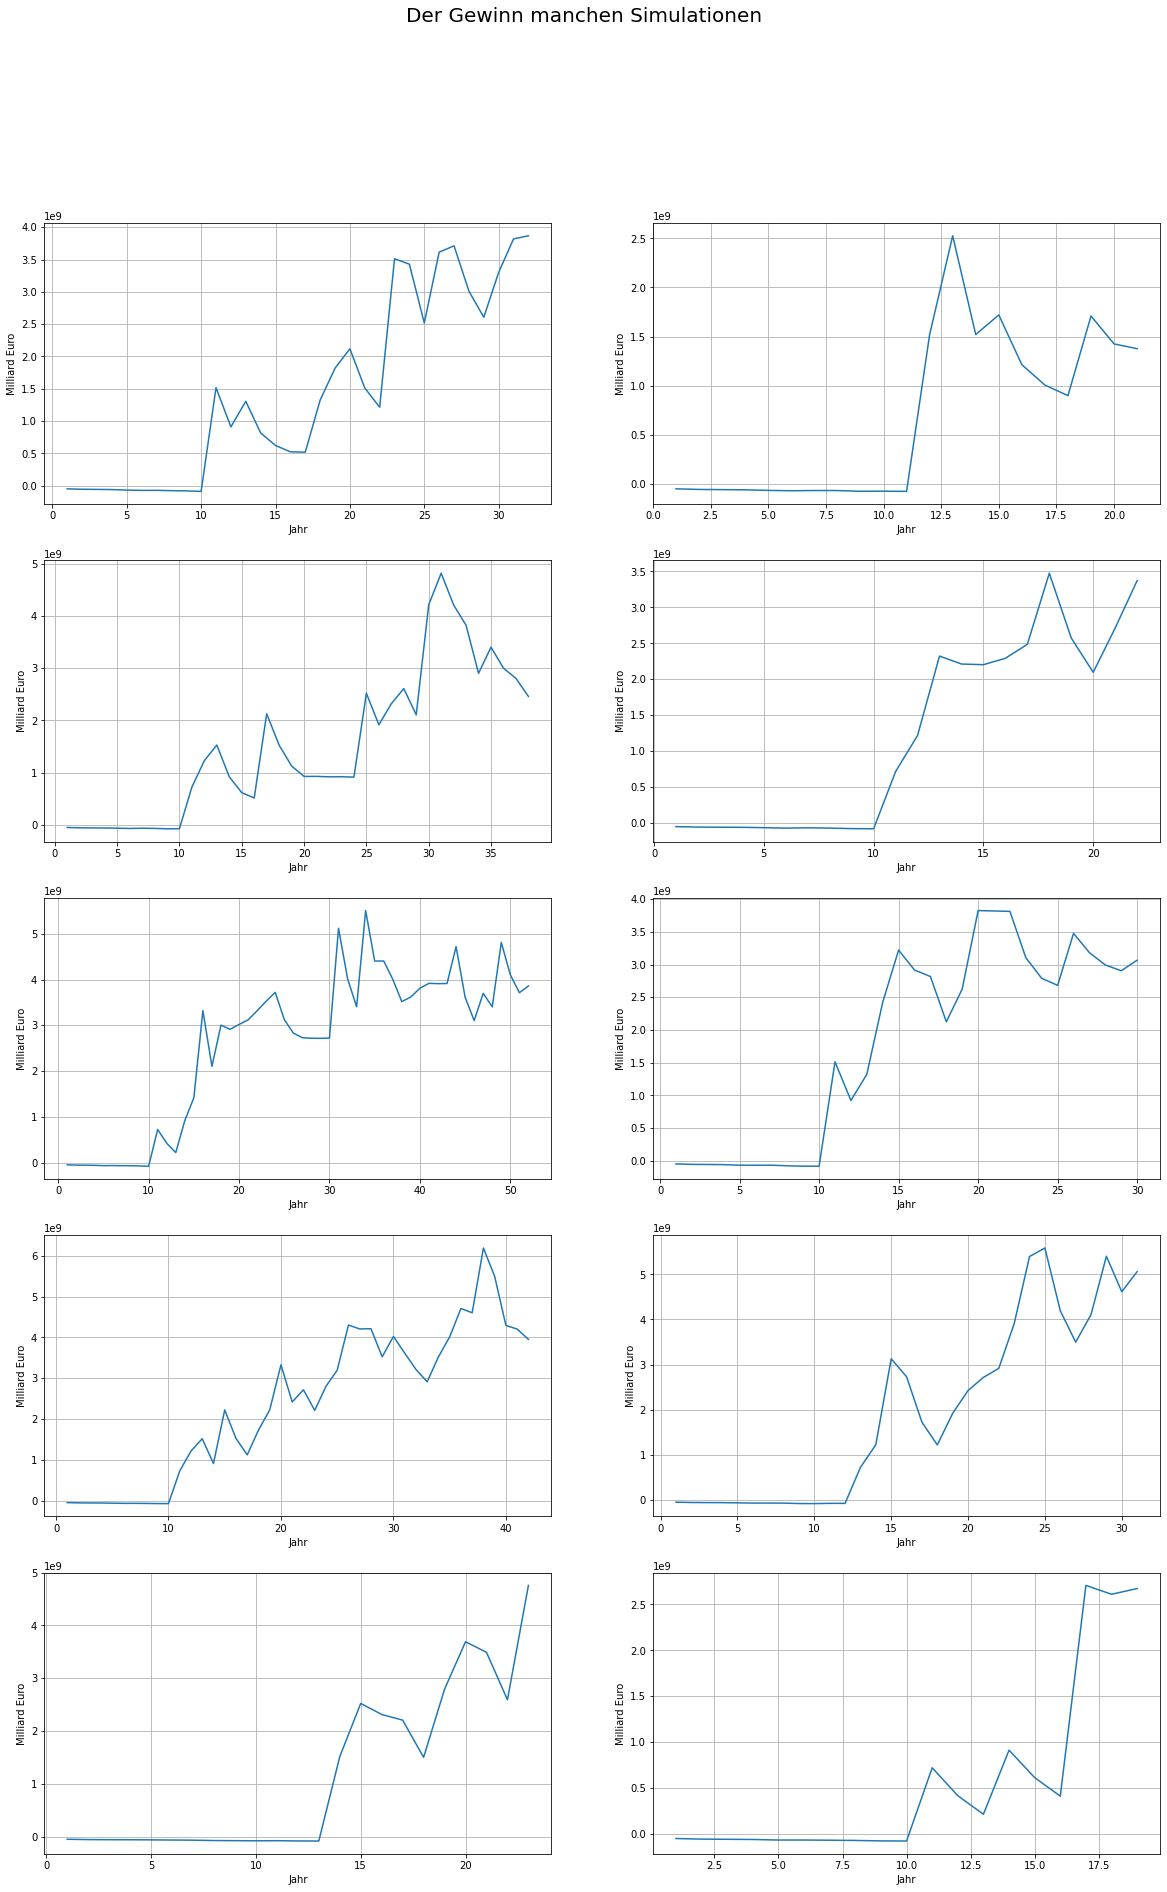

In [38]:
fig, axis = plt.subplots(5,2)
index = 0
for i in range(5):
    for j in range(2):
        gewinn[index].plot(ax=axis[i,j], xlabel = 'Jahr',ylabel = 'Milliard Euro', grid = True)
        index += 1
fig.set_figheight(30)
fig.set_figwidth(20)
fig.suptitle('Der Gewinn manchen Simulationen',size=20)
plt.show()

Die Gewinne bekommt die Geschäft meistens nach 12 Jahre (wie oben geschätzt). Im Lauf der Zeit steigt jeder Gewinn aber nicht immer. Es hängt auch davon, ob die Geschäft neue Medikaments erfolgreich herstellen kann und auch wie viel die Patentgewinne der Wirkstoffe im Profiling ist.